## Processing unstructured data

### Extracting accounting data from different document types

#### JSON

JSON stands for JavaScript Object Notation. It is a popular format for transporting and storing data, especially in web-page management. Python has a built-in library for encoding/decoding JSON files. In the following are basic examples how to use it.

In [1]:
import json

The format of JSON is very similar to a Python dictionary.

In [3]:
json_example = '{ "Company":"Nokia", "Country":"Finland", "ROA":0.12}'

loads() turns JSONs to dictionaries.

In [5]:
result_dict = json.loads(json_example)

In [6]:
result_dict

{'Company': 'Nokia', 'Country': 'Finland', 'ROA': 0.12}

In [7]:
result_dict['ROA']

0.12

dumps() can be used to change dictionaries to JSON objects.

In [8]:
pyth_dict = {"Company":"Apple", "Country":"USA", "ROA":0.17}

In [9]:
results_json = json.dumps(pyth_dict)

In [11]:
results_json # Notice the outer single quotation marks.

'{"Company": "Apple", "Country": "USA", "ROA": 0.17}'

More specifically, dumps() will change Python objects into JSON objects with the following rules:
* Python dict to JSON object
* Python list to JSON array
* Python tuple to JSON array
* Python string to JSON string
* Python int to JSON number
* Python float to JSON number
* Python boolean to JSON boolean
* Python None to JSON null

Very often, data providers set up API services to connect applications to databases. Often, these API services will use XML or JSON formats to exchange data between the client and the server. Therefore, it is essential to know how to read these files.

With json-library, you can use the built-in open() function to open a json file and json.loads() to transfer it to a Python object.

In [19]:
fd = open('company_tickers.json')

In [20]:
comp_dict = json.loads(fd.read())

In [33]:
list(comp_dict.items())[:10]

[('0', {'cik_str': 1750, 'ticker': 'AIR', 'title': 'AAR CORP'}),
 ('1', {'cik_str': 1800, 'ticker': 'ABT', 'title': 'ABBOTT LABORATORIES'}),
 ('2', {'cik_str': 1961, 'ticker': 'WDDD', 'title': 'WORLDS INC'}),
 ('3', {'cik_str': 2034, 'ticker': 'ACET', 'title': 'ACETO CORP'}),
 ('4', {'cik_str': 2034, 'ticker': 'ACETQ', 'title': 'ACETO CORP'}),
 ('5', {'cik_str': 2098, 'ticker': 'ACU', 'title': 'ACME UNITED CORP'}),
 ('6',
  {'cik_str': 2135,
   'ticker': 'ACS',
   'title': 'AFFILIATED COMPUTER SERVICES INC'}),
 ('7',
  {'cik_str': 2178,
   'ticker': 'AE',
   'title': 'ADAMS RESOURCES & ENERGY, INC.'}),
 ('8', {'cik_str': 2186, 'ticker': 'BKTI', 'title': 'BK Technologies Corp'}),
 ('9',
  {'cik_str': 2230,
   'ticker': 'ADX',
   'title': 'ADAMS DIVERSIFIED EQUITY FUND, INC.'})]

Pandas has also functios to read JSON objects

In [34]:
import pandas as pd

In [35]:
json_df = pd.read_json('company_tickers.json')

In [36]:
json_df

,0,1,2,3,4,5,6,7,8,9,...,13623,13624,13625,13626,13627,13628,13629,13630,13631,13632
cik_str,1750,1800,1961,2034,2034,2098,2135,2178,2186,2230,...,1787791,1788028,1788028,1788841,1789760,1789760,1789832,1790625,1791091,1791091
ticker,AIR,ABT,WDDD,ACET,ACETQ,ACU,ACS,AE,BKTI,ADX,...,JIH,AMHC,AMHCU,GRNV,CIIC,CIICU,HESM,LIVK,HCCO,HCCOU
title,AAR CORP,ABBOTT LABORATORIES,WORLDS INC,ACETO CORP,ACETO CORP,ACME UNITED CORP,AFFILIATED COMPUTER SERVICES INC,"ADAMS RESOURCES & ENERGY, INC.",BK Technologies Corp,"ADAMS DIVERSIFIED EQUITY FUND, INC.",...,"Juniper Industrial Holdings, Inc.",Amplitude Healthcare Acquisition Corp,Amplitude Healthcare Acquisition Corp,GreenVision Acquisition Corp.,CIIG Merger Corp.,CIIG Merger Corp.,Hess Midstream LP,LIV Capital Acquisition Corp.,Healthcare Merger Corp.,Healthcare Merger Corp.


In [37]:
json_df.transpose()

,cik_str,ticker,title
0,1750,AIR,AAR CORP
1,1800,ABT,ABBOTT LABORATORIES
2,1961,WDDD,WORLDS INC
3,2034,ACET,ACETO CORP
4,2034,ACETQ,ACETO CORP
...,...,...,...
13628,1789760,CIICU,CIIG Merger Corp.
13629,1789832,HESM,Hess Midstream LP
13630,1790625,LIVK,LIV Capital Acquisition Corp.
13631,1791091,HCCO,Healthcare Merger Corp.


#### XML

https://docs.python.org/3/library/xml.etree.elementtree.html

In [ ]:
pd.read_


#### XBLR

https://pypi.org/project/python-xbrl/

https://www.codeproject.com/Articles/1227268/Accessing-Financial-Reports-in-the-EDGAR-Database

https://www.codeproject.com/Articles/1227765/Parsing-XBRL-with-Python

In [ ]:
from bs4 import BeautifulSoup
import requests
import sys

# Access page
cik = '0000051143'
type = '10-K'
dateb = '20160101'

# Obtain HTML for search page
base_url = "https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK={}&type={}&dateb={}"
edgar_resp = requests.get(base_url.format(cik, type, dateb))
edgar_str = edgar_resp.text

# Find the document link
doc_link = ''
soup = BeautifulSoup(edgar_str, 'html.parser')
table_tag = soup.find('table', class_='tableFile2')
rows = table_tag.find_all('tr')
for row in rows:
    cells = row.find_all('td')
    if len(cells) > 3:
        if '2015' in cells[3].text:
            doc_link = 'https://www.sec.gov' + cells[1].a['href']

# Exit if document link couldn't be found
if doc_link == '':
    print("Couldn't find the document link")
    sys.exit()

# Obtain HTML for document page
doc_resp = requests.get(doc_link)
doc_str = doc_resp.text

# Find the XBRL link
xbrl_link = ''
soup = BeautifulSoup(doc_str, 'html.parser')
table_tag = soup.find('table', class_='tableFile', summary='Data Files')
rows = table_tag.find_all('tr')
for row in rows:
    cells = row.find_all('td')
    if len(cells) > 3:
        if 'INS' in cells[3].text:
            xbrl_link = 'https://www.sec.gov' + cells[2].a['href']

# Obtain XBRL text from document
xbrl_resp = requests.get(xbrl_link)
xbrl_str = xbrl_resp.text

# Find and print stockholder's equity
soup = BeautifulSoup(xbrl_str, 'lxml')
tag_list = soup.find_all()
for tag in tag_list:
    if tag.name == 'us-gaap:stockholdersequity':
        print("Stockholder's equity: " + tag.text)

#### PDF

In [1]:
from pdfminer.pdfparser import PDFParser
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfpage import PDFPage
# From PDFInterpreter import both PDFResourceManager and PDFPageInterpreter
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.pdfdevice import PDFDevice
# Import this to raise exception whenever text extraction from PDF is not allowed
from pdfminer.pdfpage import PDFTextExtractionNotAllowed
from pdfminer.layout import LAParams, LTTextBox, LTTextLine
from pdfminer.converter import PDFPageAggregator

In [2]:
def convert_pdfminer(fname):
        fp = open(fname, 'rb')
        parser = PDFParser(fp)
        doc = PDFDocument(parser)
        rsrcmgr = PDFResourceManager()
        laparams = LAParams()
        device = PDFPageAggregator(rsrcmgr, laparams=laparams)
        interpreter = PDFPageInterpreter(rsrcmgr, device)
        text = ''
        for page in PDFPage.create_pages(doc):
            interpreter.process_page(page)
            layout = device.get_result()
            for lt_obj in layout:
                if isinstance(lt_obj, LTTextBox) or isinstance(lt_obj, LTTextLine):
                    text += lt_obj.get_text()
        return text

### Extracting data from the Internet

#### Social media

#### Structured data

In [ ]:
test_df = pd.read_html('https://www.nordnet.fi/markkinakatsaus/osakekurssit?selectedTab=keyFigures&sortField=pe&sortOrder=asc&exchangeCountry=FI',decimal=',')

In [3]:
work_df = pd.DataFrame()

work_df['Name'] = test_df[0]['Nimi']

work_df['P/E']= [i for [i,j] in test_df[0]['P/S'].str.split(' ')]

work_df['P/S']= [i for [i,j] in test_df[0]['P/B'].str.split(' ')]

work_df['P/B']= [i for [i,j] in test_df[0]['Tulos/osake'].str.split(' ')]

temp_list = []
for value in test_df[0]['Osinkotuotto']:
    try:
        temp_list.append(value.split(' ')[0])
    except:
        temp_list.append(value)
        
work_df['Tulos/osake'] = temp_list

temp_list = []
for value in test_df[0]['Osinko/osake']:
    try:
        temp_list.append(value.split(' ')[0])
    except:
        temp_list.append(value)
        
work_df['Osinkotuotto'] = temp_list

temp_list = []
for value in test_df[0]['Unnamed: 11']:
    try:
        temp_list.append(value.split(' ')[0])
    except:
        temp_list.append(value)
        
work_df['Lainoitusaste'] = temp_list

In [4]:
work_df

,Name,P/E,P/S,P/B,Tulos/osake,Osinkotuotto,Lainoitusaste
0,Nexstim Oyj,0.26,2.72,84.03,0.22,–,0
1,Fondia Oyj,7.61,1.46,4.93,0.97,–,10
2,Sievi Capital plc,8.38,4.88,0.89,0.12,–,0
3,Scanfil Plc,8.54,0.63,2.06,0.68,2.62,40
4,Honkarakenne Oyj B,8.58,0.46,1.72,0.43,–,10
...,...,...,...,...,...,...,...
95,KONE Corporation,39.22,3.67,12.74,1.81,2.39,85
96,Gofore Plc,42.74,2.63,5.78,0.3,1.56,10
97,Aallon Group Oyj,48.31,2.01,4.07,0.2,1.87,0
98,Telia Company AB,48.54,1.68,1.9,0.71,4.79,85


In [5]:
work_df['P/E'] = work_df['P/E'].astype('float')

work_df['P/S'] = work_df['P/S'].astype('float')

work_df['P/B'] = work_df['P/B'].astype('float')

work_df['Tulos/osake'].replace('–',np.nan,inplace=True)

work_df['Tulos/osake'] = work_df['Tulos/osake'].astype('float')

work_df['Osinkotuotto'].replace('–',np.nan,inplace=True)

work_df['Osinkotuotto'] = work_df['Osinkotuotto'].astype('float')

work_df['Lainoitusaste'].replace('–',np.nan,inplace=True)

work_df['Lainoitusaste'] = work_df['Lainoitusaste'].astype('float')

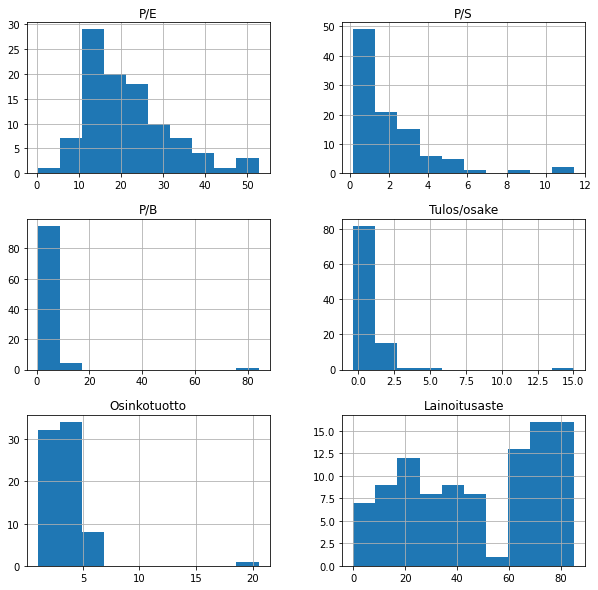

In [6]:
work_df.hist(figsize=(10,10))
plt.show()

### Processing text data

#### Regular experssions

https://www.regular-expressions.info/quickstart.html

### Processing video and images

#### Satellite data

In [ ]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
my_example_nc_file = 'S5P_NRTI_L2__NO2____20200309T105605_20200309T110105_12457_01_010302_20200309T114222.nc'
fh = Dataset(my_example_nc_file, mode='r')

In [65]:
print(fh.groups['PRODUCT'].variables['nitrogendioxide_tropospheric_column_precision'])

<class 'netCDF4._netCDF4.Variable'>
float32 nitrogendioxide_tropospheric_column_precision(time, scanline, ground_pixel)
    units: mol m-2
    standard_name: troposphere_mole_content_of_nitrogen_dioxide standard_error
    long_name: Precision of the tropospheric vertical column of nitrogen dioxide
    coordinates: longitude latitude
    multiplication_factor_to_convert_to_molecules_percm2: 6.022141e+19
    _FillValue: 9.96921e+36
path = /PRODUCT
unlimited dimensions: 
current shape = (1, 373, 450)
filling on


In [66]:
lons = fh.groups['PRODUCT'].variables['longitude'][:][0,:,:]
lats = fh.groups['PRODUCT'].variables['latitude'][:][0,:,:]
no2 = fh.groups['PRODUCT'].variables['nitrogendioxide_tropospheric_column_precision'][0,:,:]
print (lons.shape)
print (lats.shape)
print (no2.shape)

(373, 450)
(373, 450)
(373, 450)


In [67]:
no2_units = fh.groups['PRODUCT'].variables['nitrogendioxide_tropospheric_column_precision'].units

In [68]:
no2_units

'mol m-2'

In [69]:
from matplotlib.colors import LogNorm
from mpl_toolkits.basemap import Basemap

In [122]:
lon_0 = lons.mean()
lat_0 = lats.mean()

m = Basemap(width=3000000,height=2500000,
            resolution='l',projection='stere',lat_0=lat_0,lon_0=lon_0)

xi, yi = m(lons, lats)

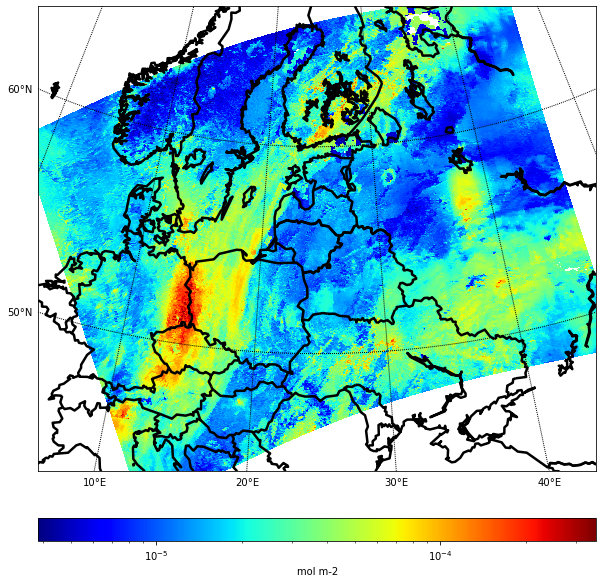

In [123]:
plt.figure(figsize=(10,10))
cs = m.pcolor(xi,yi,np.squeeze(no2),norm=LogNorm(), cmap='jet')
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines(linewidth=2.5)
m.drawcountries(linewidth=2.5)
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(no2_units)
plt.savefig('test.png')

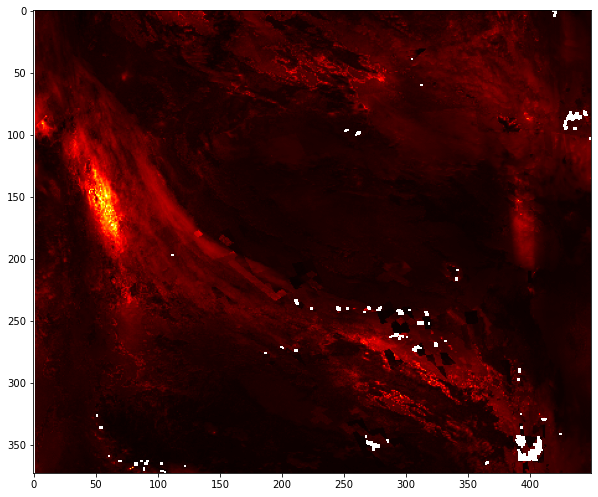

In [124]:
plt.figure(figsize=(10,10))
plt.imshow(no2,cmap='hot')

### Speech recognition and synthesis

### Feature engineering